In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
import numpy as np
pd.options.display.max_columns = 10000

In [3]:
df = pd.read_csv('data/Horror.csv')
df.head()

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
0,Get Out,2017.0,Jordan Peele,104,605132,261668,4.1,647,1560,1001,5727,5821,34069,45053,136842,65726,110264
1,Zombieland,2009.0,Ruben Fleischer,88,339357,77110,3.6,477,1384,1353,6280,9055,37228,43168,53117,10931,11907
2,Suspiria,2018.0,Luca Guadagnino,152,122728,37820,3.7,611,1253,1266,4151,4844,12282,15033,25865,13732,12889
3,Halloween,1978.0,John Carpenter,91,212751,59124,4.0,204,700,602,3003,3627,15715,17598,35627,14882,29077
4,Rosemary's Baby,1968.0,Roman Polanski,137,158689,46272,4.2,156,372,253,1326,1412,6933,9562,27455,18616,24435


In [4]:
df.describe(include='all')

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
count,11052,11046.000000,10976,11052.000000,11052.000000,11052.000000,11052.000000,11052.000000,11052.000000,11052.000000,11052.000000,11052.000000,11052.000000,11052.000000,11052.000000,11052.000000,11052.000000
unique,10339,NaN,6826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Dr. Jekyll and Mr. Hyde,NaN,David DeCoteau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,8,NaN,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1997.829712,NaN,83.197883,4344.529406,823.853782,2.810062,52.435215,99.525606,93.569399,234.609482,241.492038,511.017101,422.037821,507.563156,169.017644,214.110297
std,NaN,20.641835,NaN,28.903248,22098.558663,6153.743060,0.461166,237.354295,394.178772,345.956247,888.161944,899.024736,2229.331836,2211.361403,3773.986745,1676.276906,2646.450847
min,NaN,1895.000000,NaN,1.000000,34.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1986.000000,NaN,80.000000,104.000000,10.000000,2.500000,2.000000,5.000000,5.000000,9.000000,8.000000,11.000000,5.000000,3.000000,0.000000,1.000000
50%,NaN,2006.000000,NaN,89.000000,277.000000,31.000000,2.800000,7.000000,13.000000,13.000000,25.000000,24.000000,33.000000,17.000000,11.000000,2.000000,3.000000
75%,NaN,2014.000000,NaN,95.000000,1110.250000,148.000000,3.100000,22.000000,40.000000,41.000000,93.000000,96.000000,157.000000,90.000000,61.000000,12.000000,14.000000


In [5]:
df.info()
# maybe convert object to string? does it matter?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11052 entries, 0 to 11051
Data columns (total 17 columns):
title              11052 non-null object
year               11046 non-null float64
director           10976 non-null object
running_time       11052 non-null int64
views              11052 non-null int64
likes              11052 non-null int64
avg_rating         11052 non-null float64
half_star          11052 non-null int64
one_star           11052 non-null int64
one_half_star      11052 non-null int64
two_star           11052 non-null int64
two_half_star      11052 non-null int64
three_star         11052 non-null int64
three_half_star    11052 non-null int64
four_star          11052 non-null int64
four_half_star     11052 non-null int64
five_star          11052 non-null int64
dtypes: float64(2), int64(13), object(2)
memory usage: 1.4+ MB


In [6]:
df.isna().sum()

title               0
year                6
director           76
running_time        0
views               0
likes               0
avg_rating          0
half_star           0
one_star            0
one_half_star       0
two_star            0
two_half_star       0
three_star          0
three_half_star     0
four_star           0
four_half_star      0
five_star           0
dtype: int64

In [7]:
df['title'][df['director'].isna()]

1064                                      Harper's Island
1274                             Todd McFarlane's Spawn 2
1457                                    Silent Hills P.T.
1638                                          Prai Takian
1731                                    Tokyo Ghoul: Jack
1752                    Boogeymen: The Killer Compilation
1910                                                 Büyü
2029                                  Traces of Death III
2178             Trailer Trauma Part 4: Television Trauma
2217                                    Night Night Nancy
2224                                      No Through Road
2227                      Traces of Death IV: Resurrected
2232                                           After Dark
2235                              The Ticket of Leave Man
2247                                     Killer Christmas
2384                                        Antoni Psycho
2395                                Copiii: The 1st Entry
2400          

In [8]:
df['title'][df['year'].isna()]

2400                                      President's Day
2448    The Very Best of Ghost Hunters: Vol. 1: Most B...
2454                                        Silent Breath
2506                            The Golden Arm (Michigan)
2638                                                 Shed
2664                                Frozen 2: Even Better
Name: title, dtype: object

In [9]:
df['avg_rating'].mean()

2.8100615273253724

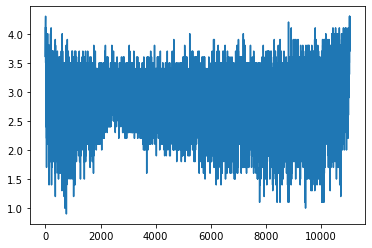

In [10]:
# check that there's nothing unusual in the distribution of ratings
plt.plot(df['avg_rating'])
plt.show()

In [11]:
# drop null values
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10972 entries, 0 to 11051
Data columns (total 17 columns):
title              10972 non-null object
year               10972 non-null float64
director           10972 non-null object
running_time       10972 non-null int64
views              10972 non-null int64
likes              10972 non-null int64
avg_rating         10972 non-null float64
half_star          10972 non-null int64
one_star           10972 non-null int64
one_half_star      10972 non-null int64
two_star           10972 non-null int64
two_half_star      10972 non-null int64
three_star         10972 non-null int64
three_half_star    10972 non-null int64
four_star          10972 non-null int64
four_half_star     10972 non-null int64
five_star          10972 non-null int64
dtypes: float64(2), int64(13), object(2)
memory usage: 1.5+ MB


In [12]:
# drop columns with where either director or year is missing
# drop columns with non unique titles but check first whether the other features are different (different films with same title)
#maybe unique movies aren't important
df['title'].nunique()

10264

In [13]:
dummies_df = pd.get_dummies(df, columns=['director']).head()

In [14]:
dummies_df.shape

(5, 6839)

In [15]:
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
feature_names = [c for c in dummies_df.columns if c[0] == 'd']
feature_names

['director_A. Edward Sutherland',
 'director_A. L. Vijay',
 'director_A.B. Stone',
 'director_A.D. Calvo',
 'director_A.J. Briones',
 'director_A.T. White',
 'director_AJ Meadows',
 'director_AJ Pinkerton',
 'director_AJ Wedding',
 'director_Aaron B. Koontz',
 'director_Aaron Cadieux,Manny Famolare',
 'director_Aaron Jay Rome',
 'director_Aaron Keeling,Austin Keeling',
 'director_Aaron Mento',
 'director_Aaron Mirtes',
 'director_Aaron Moorhead,Justin Benson',
 'director_Aaron Norris',
 'director_Aaron Pederis',
 'director_Aaron Robson',
 'director_Aaron Woodley,Directors Program',
 'director_Aaron Yonda',
 'director_Aash Aaron',
 'director_Abdelhamid Bouchnak',
 'director_Abe Forsythe',
 'director_Abe Rosenberg Fishbein',
 'director_Abel Ferrara',
 'director_Abel Ferry',
 'director_Abel Gance',
 'director_Abel Vang,Burlee Vang',
 'director_Abiel Bruhn,John Rocco',
 'director_Abigail Blackmore',
 'director_Abner Pastoll',
 'director_Ace Jordan',
 'director_Achim Bornhak',
 'director_Ac

In [17]:
# feature_names[16:]

# use starts with director

SyntaxError: invalid syntax (<ipython-input-17-586d8ffd00cb>, line 3)

In [39]:
# X = dummies_df
# Y = ['avg_rating']
X = dummies_df[feature_names]
X.head()

,director_A. Edward Sutherland,director_A. L. Vijay,director_A.B. Stone,director_A.D. Calvo,director_A.J. Briones,director_A.T. White,director_AJ Meadows,director_AJ Pinkerton,director_AJ Wedding,director_Aaron B. Koontz,"director_Aaron Cadieux,Manny Famolare",director_Aaron Jay Rome,"director_Aaron Keeling,Austin Keeling",director_Aaron Mento,director_Aaron Mirtes,"director_Aaron Moorhead,Justin Benson",director_Aaron Norris,director_Aaron Pederis,director_Aaron Robson,"director_Aaron Woodley,Directors Program",director_Aaron Yonda,director_Aash Aaron,director_Abdelhamid Bouchnak,director_Abe Forsythe,director_Abe Rosenberg Fishbein,director_Abel Ferrara,director_Abel Ferry,director_Abel Gance,"director_Abel Vang,Burlee Vang","director_Abiel Bruhn,John Rocco",director_Abigail Blackmore,director_Abner Pastoll,director_Ace Jordan,director_Achim Bornhak,"director_Achmad Romie,Andra Fembrianto,Ihsan Fadli,Kristian Panca Nugroho,Orizon Astonia,Vicky Ray",director_Acán Coen,director_Adam Ahlbrandt,"director_Adam Bartlett,John Pata","director_Adam Brooks,Jeremy Gillespie,Matthew Kennedy,Steven Kostanski,Conor Sweeney","director_Adam Brooks,Matthew Kennedy",director_Adam Cushman,director_Adam Deyoe,"director_Adam Deyoe,Eric Gosselin",director_Adam Egypt Mortimer,director_Adam Fields,director_Adam Ford,director_Adam Friedman,director_Adam Gierasch,director_Adam Graveley,director_Adam Green,director_Adam Grossman,director_Adam Holender,director_Adam Krause,director_Adam Lamas,director_Adam Levins,director_Adam MacDonald,director_Adam Marcus,director_Adam Mason,"director_Adam Mason,Simon Boyes",director_Adam Massey,director_Adam Minarovich,director_Adam Penn,director_Adam Rehmeier,director_Adam Rifkin,"director_Adam Rifkin,Bear McCreary,Adam Green,Joe Lynch,Tim Sullivan",director_Adam Ripp,director_Adam Robitel,director_Adam Schindler,director_Adam Simon,"director_Adam Simon,Darren Moloney","director_Adam Stilwell,Andrew Rizzo,Adam Pitman,Nathaniel Peterson,David Blair",director_Adam Stovall,director_Adam Wingard,director_Adolfo Alix Jr.,director_Adrian Corona,director_Adrian Hoven,"director_Adrian Hoven,Michael Armstrong",director_Adrian Lyne,director_Adrian Panek,director_Adrian Picardi,director_Adrian Weiss,director_Adrian Țofei,director_Adrián García Bogliano,"director_Adrián García Bogliano,Ramiro García Bogliano",director_Agnieszka Smoczyńska,director_Agnieszka Wojtowicz-Vosloo,director_Agnès Merlet,director_Agustí Villaronga,director_Ahn Byeong-ki,director_Ahn Sang-Hoon,director_Aidan Belizaire,director_Aidan Breznick,director_Aiden Dillard,director_Aik Karapetian,director_Aisling Walsh,director_Aislinn Clarke,director_Aitor Uribarri,director_Ajmal Zaheer Ahmad,director_Akihiko Shiota,director_Akihiro Kashima,director_Akio Jissoji,"director_Akio Jissoji,Atsushi Kaneko,Hisayasu Satô,Suguru Takeuchi",director_Akio Yoshida,director_Akira Iwanaga,director_Akira Kobayashi,director_Akiva Goldsman,"director_Akiva Saunders,John Fell Ryan",director_Akiyuki Shinbo,"director_Akiyuki Shinbo,Tatsuya Oishi",director_Akshay Akkineni,director_Al Adamson,"director_Al Adamson,Paul Aratow","director_Al Guest,Jean Mathieson",director_Alain Jessua,director_Alain Robak,director_Alain Robbe-Grillet,director_Alain Vézina,director_Alan Beattie,director_Alan Berliner,director_Alan Birkinshaw,director_Alan Briggs,director_Alan Clarke,director_Alan Cumming,director_Alan Gadney,director_Alan Gibson,director_Alan J. Levi,director_Alan J. Pakula,director_Alan James,director_Alan Lougher,director_Alan Parker,director_Alan Resnick,"director_Alan Resnick,Ben O'Brien",director_Alan Rudolph,director_Alan Smithee,"director_Alan Smithee,Dean Tschetter","director_Alan Smithee,Juan A. Mas","director_Alan Smithee,Kevin Yagher","director_Alan Smithee,Lee Madden","director_Alan Smithee,Ramsey Thomas",director_Alastair Orr,director_Alastair Reid,director_Albert Band,director_Albert DeMond,"director_Albert Hughes,Allen Hughes",director_Albert Lewin,"director_Albert Pintó,Ca

In [40]:
# target vriable
target = ['avg_rating']
y = df[target]
y.head()

,avg_rating
0,4.1
1,3.6
2,3.7
3,4.0
4,4.2


In [41]:
# director categorical model
model.fit(X, y)
model.coef_

ValueError: Found input variables with inconsistent numbers of samples: [5, 10972]

In [42]:
# running time model
features = ['running_time']
target = ['avg_rating']
X = df[features]
y = df[target]

In [43]:
model.fit(X,y)
model.coef_

array([[-0.00233359]])

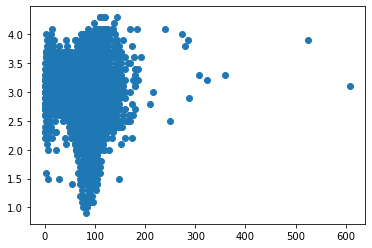

In [44]:
ax = plt.scatter(X, y)

plt.show()

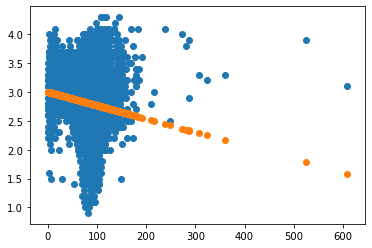

In [45]:
y_pred = model.predict(X)
plt.scatter(X, y)
plt.scatter(X, y_pred)
plt.show()

In [ ]:
# to do:
# clean data
# types of variables
# Calculate summary statistics for each of your columns, 
# such as mean, median, mode, standard deviation, range, 
# and number of unique values. What does this tell you about your data? What do you now need to investigate?